<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Deep-Learning-Projects/blob/main/multiclass-classification/mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este relatório documenta o projeto realizado no Jupyter Notebook para a classificação de dígitos manuscritos usando a base de dados MNIST. O projeto abrange desde a preparação dos dados até a validação do modelo, incluindo etapas de aumento de dados.

# Diretório de trabalho

- Montagem do Google Drive e alteração do diretório de trabalho para acessar os arquivos do notebook e os dados utilizados no projeto:

In [1]:
from google.colab import drive
import os

# Monta o drive no Google Colab
drive.mount('/content/drive',force_remount=True)

# Altera o diretório de trabalho
os.chdir('/content/drive/MyDrive/Colab Notebooks/UDEMY/DEEP LEARNING')

Mounted at /content/drive


# Importação de Pacotes e Funções

- Importação dos principais pacotes utilizados ao longo do projeto, incluindo `pandas, numpy, matplotlib.pyplot, scikit-learn e keras` para manipulação de dados e construção do modelo:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

# Carregando os Dados

- **Base de Dados MNIST**: Carregamento dos dados de treinamento e teste diretamente com a função `load_data()`.

In [3]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_treinamento.shape, X_teste.shape, X_teste.dtype

((60000, 28, 28), (10000, 28, 28), dtype('uint8'))

In [5]:
y_treinamento.shape, y_teste.shape, y_teste.dtype

((60000,), (10000,), dtype('uint8'))

- **Visualização de uma Imagem:** Exibição da primeira imagem do conjunto de treinamento para verificar os dados.

Text(0.5, 1.0, 'Classe 5')

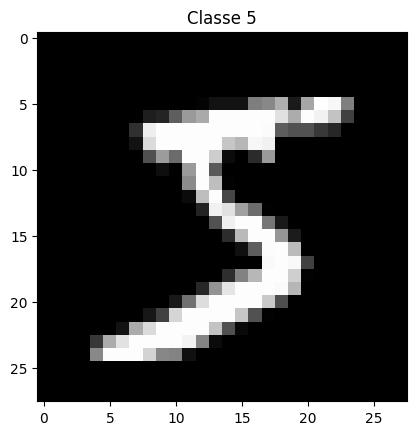

In [6]:
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

# Tratamento dos Dados

- **Preparação dos Previsores:** Normalização e remodelagem dos dados para serem utilizados na rede neural convolucional.

In [7]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [8]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [9]:
previsores_treinamento /= 255
previsores_teste /= 255

- **Codificação das Classes:** Conversão das classes para o formato categórico.

In [10]:
classe_treinamento = to_categorical(y_treinamento)
classe_teste = to_categorical(y_teste)

In [11]:
classe_treinamento[0], y_treinamento[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

# Contrução da Rede

- **Arquitetura da Rede Neural:** Uso de camadas convolucionais, de normalização, pooling e densas.

In [12]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3),
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10,
                        activation = 'softmax'))

In [13]:
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

- **Treinamento do Modelo:** Execução do treinamento com validação nos dados de teste.

In [15]:
history = classificador.fit(previsores_treinamento,
                            classe_treinamento,
                            batch_size = 128,
                            epochs = 5,
                            validation_data = (previsores_teste,
                                               classe_teste))

Epoch 1/5
469/469 [==============================] - 59s 125ms/step - loss: 0.0691 - accuracy: 0.9795 - val_loss: 0.0425 - val_accuracy: 0.9869
Epoch 2/5
469/469 [==============================] - 62s 133ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0336 - val_accuracy: 0.9903
Epoch 3/5
469/469 [==============================] - 72s 155ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 4/5
469/469 [==============================] - 59s 126ms/step - loss: 0.0306 - accuracy: 0.9913 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 5/5
469/469 [==============================] - 54s 114ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.0431 - val_accuracy: 0.9885


# Avaliação

- **Avaliação do Modelo:** Uso da função `evaluate()` para testar a eficácia do modelo.

In [16]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 3s 11ms/step - loss: 0.0431 - accuracy: 0.9885


In [17]:
previsoes = classificador.predict(previsores_teste)

313/313 [==============================] - 3s 8ms/step


In [18]:
previsoes = (previsoes > 0.5)

In [19]:
previsoes[0]

array([False, False, False, False, False, False, False,  True, False,
       False])

In [21]:
classe_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

- **Matriz de Confusão:** Visualização para entender as previsões em detalhe.

In [22]:
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

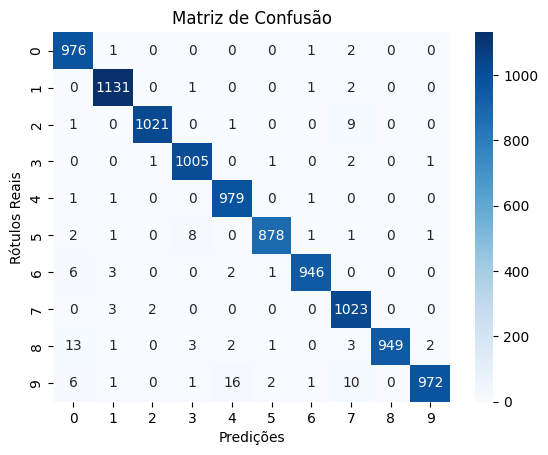

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

# Plotar a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=class_labels)
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       1.00      0.97      0.99       974
           9       1.00      0.96      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Validação Cruzada

In [26]:
seed = 5
np.random.seed(seed)

In [27]:
(X, y), (X_teste, y_teste) = mnist.load_data()
previsores = X.reshape(X.shape[0], 28, 28, 1)
previsores = previsores.astype('float32')
previsores /= 255
classe = to_categorical(y, 10)

In [30]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
fold_metrics = []

for i, (train_index, test_index) in enumerate(kfold.split(previsores, np.zeros(shape = (classe.shape[0], 1)))):
  print(f"Fold {i}:")
  classificador = Sequential()
  classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
  classificador.add(MaxPooling2D(pool_size = (2,2)))
  classificador.add(Flatten())
  classificador.add(Dense(units = 128, activation = 'relu'))
  classificador.add(Dense(units = 10, activation = 'softmax'))
  classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                        metrics = ['accuracy'])
  classificador.fit(previsores[train_index], classe[train_index],
                    batch_size = 128, epochs = 5)
  precisao = classificador.evaluate(previsores[test_index], classe[test_index])
  fold_metrics.append(precisao)

Fold 0:
Epoch 1/5
375/375 [==============================] - 30s 77ms/step - loss: 0.2382 - accuracy: 0.9329
Epoch 2/5
375/375 [==============================] - 27s 72ms/step - loss: 0.0761 - accuracy: 0.9773
Epoch 3/5
375/375 [==============================] - 22s 58ms/step - loss: 0.0521 - accuracy: 0.9851
Epoch 4/5
375/375 [==============================] - 21s 55ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9823
Fold 1:
Epoch 1/5
375/375 [==============================] - 22s 57ms/step - loss: 0.2646 - accuracy: 0.9257
Epoch 2/5
375/375 [==============================] - 21s 55ms/step - loss: 0.0830 - accuracy: 0.9758
Epoch 3/5
375/375 [==============================] - 21s 57ms/step - loss: 0.0532 - accuracy: 0.9842
Epoch 4/5
375/375 [==============================] - 21s 55ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.05

## Métricas

- Cálculo da média e desvio padrão das métricas após todos os folds:

In [31]:
n_splits = 5

In [33]:
# Média das métricas após todos os folds
mean_metrics = np.mean(fold_metrics, axis=0)
loss_mean = mean_metrics[0]
accuracy_mean = mean_metrics[1]
# auc_mean = mean_metrics[2]

print(f'Métricas médias após {n_splits}-Fold Cross-Validation: {mean_metrics}')
print(f'Média da Perda: {loss_mean:.3f}')
print(f'Média da Acurácia: {accuracy_mean:.3f}')
# print(f'Média do AUC: {auc_mean:.3f}')

Métricas médias após 5-Fold Cross-Validation: [0.05572976 0.98355   ]
Média da Perda: 0.056
Média da Acurácia: 0.984


In [34]:
# Calcular o desvio padrão para cada métrica
std_devs = np.std(fold_metrics, axis=0)
loss_std = std_devs[0]
accuracy_std = std_devs[1]
# auc_std = std_devs[2]

print(f'Desvio padrão das métricas após {n_splits}-Fold Cross-Validation: {std_devs}')
print(f'Desvio padrão da Perda: {loss_std:.3f}')
print(f'Desvio padrão da Acurácia: {accuracy_std:.3f}')
# print(f'Desvio padrão do AUC: {auc_std:.3f}')

Desvio padrão das métricas após 5-Fold Cross-Validation: [0.00411726 0.00124789]
Desvio padrão da Perda: 0.004
Desvio padrão da Acurácia: 0.001


- Visualização dos resultados por meio de gráficos de barras para cada métrica ao longo dos folds:

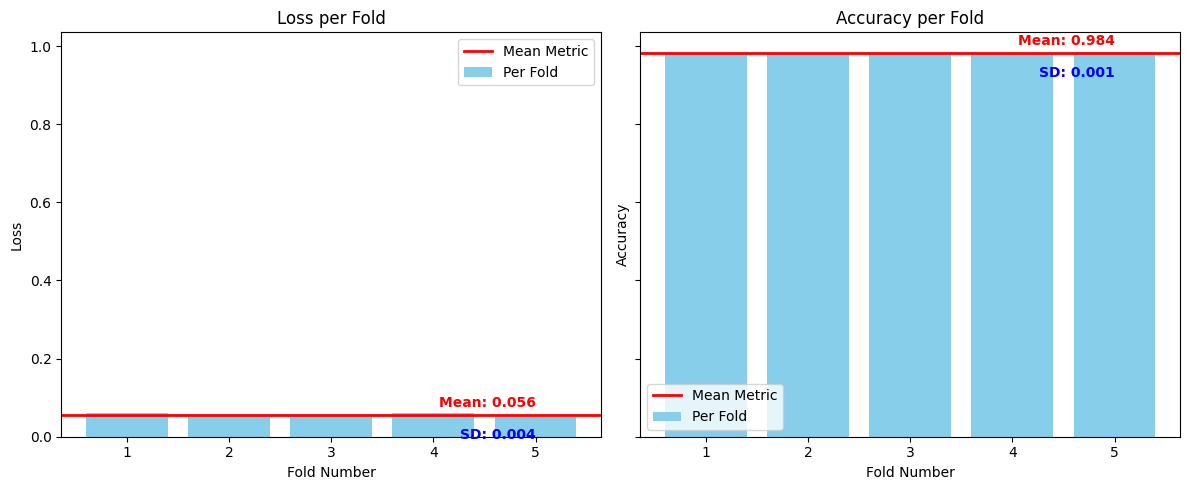

In [35]:
# Nomes das métricas
metric_names = ['Loss', 'Accuracy']#, 'AUC']

fold_metrics_np = np.array(fold_metrics)

# Criar um plot para cada métrica
fig, axs = plt.subplots(1, len(metric_names), figsize=(12, 5), sharey=True)

for i, metric_name in enumerate(metric_names):

    # Extrair a métrica específica de todos os folds
    metric_values = fold_metrics_np[:, i]

    # Índices para o eixo x
    x = np.arange(len(metric_values)) + 1  # Folds 1 a K

    # Plotando as métricas de cada fold
    axs[i].bar(x, metric_values, color='skyblue', label='Per Fold')

    # Linha horizontal para a média
    axs[i].axhline(y=mean_metrics[i], color='red', linewidth=2, label='Mean Metric')

    # Anotação para a média
    axs[i].text(x=len(metric_values), y=mean_metrics[i] + 0.03, s=f'Mean: {mean_metrics[i]:.3f}',
                color='red', va='center', ha='right', fontweight='bold')

    # Anotação para o desvio padrão
    axs[i].text(x=len(metric_values), y=mean_metrics[i] - 0.07, s=f'SD: {std_devs[i]:.3f}',
                color='blue', va='bottom', ha='right', fontweight='bold')

    # Adicionando título e fazendo ajustes no eixo
    axs[i].set_title(f'{metric_name} per Fold')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_xticks(x)
    axs[i].set_ylabel(metric_name)
    axs[i].legend()

# Mostrar o plot
plt.tight_layout()
plt.show()

# Data Augmentation

In [36]:
gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator()

base_treinamento = gerador_treinamento.flow(previsores_treinamento,
                                            classe_treinamento, batch_size = 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size = 128)

In [38]:
classificador.fit_generator(base_treinamento,
                            epochs = 5, validation_data = base_teste,
                            )

<ipython-input-38-f369d28232e0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classificador.fit_generator(base_treinamento,


Epoch 1/5
469/469 [==============================] - 51s 109ms/step - loss: 0.1518 - accuracy: 0.9518 - val_loss: 0.0697 - val_accuracy: 0.9777
Epoch 2/5
469/469 [==============================] - 43s 92ms/step - loss: 0.1194 - accuracy: 0.9623 - val_loss: 0.0701 - val_accuracy: 0.9778
Epoch 3/5
469/469 [==============================] - 47s 100ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 4/5
469/469 [==============================] - 48s 102ms/step - loss: 0.0968 - accuracy: 0.9699 - val_loss: 0.0640 - val_accuracy: 0.9803
Epoch 5/5
469/469 [==============================] - 44s 93ms/step - loss: 0.0887 - accuracy: 0.9723 - val_loss: 0.0687 - val_accuracy: 0.9781


# Avaliação

- **Avaliação do Modelo:** Uso da função `evaluate()` para testar a eficácia do modelo.

In [39]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 2s 5ms/step - loss: 0.0687 - accuracy: 0.9781


In [40]:
previsoes = classificador.predict(previsores_teste)

313/313 [==============================] - 2s 6ms/step


In [41]:
previsoes = (previsoes > 0.5)

In [42]:
previsoes[0]

array([False, False, False, False, False, False, False,  True, False,
       False])

In [43]:
classe_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

- **Matriz de Confusão:** Visualização para entender as previsões em detalhe.

In [44]:
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

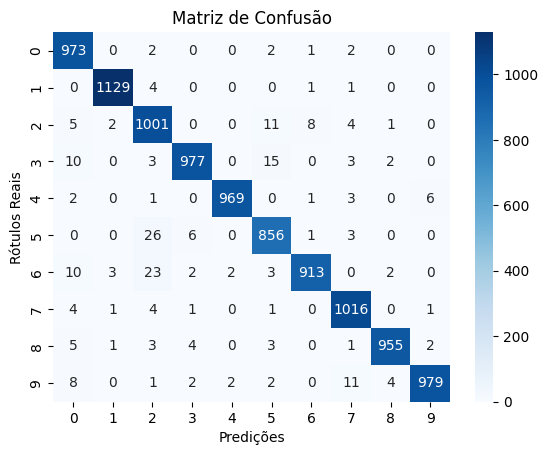

In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

# Plotar a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


In [46]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=class_labels)
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.97      0.95      1032
           3       0.98      0.97      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.96      0.96      0.96       892
           6       0.99      0.95      0.97       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
